In [8]:
#model to extract only movie details from given link
from bs4 import BeautifulSoup
import requests
import html5lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



url=requests.get("https://www.imdb.com/chart/top/")
soup=BeautifulSoup(url.text,'html5lib')
movies_itr=iter(soup.find('tbody',class_="lister-list").find_all('tr'))
data=[]
for movie in movies_itr:
    
    try:
        mrank=movie.find('td',class_='titleColumn').get_text(strip=True).split('.')[0]
        mname=movie.find('td',class_='titleColumn').a.text
        myear=movie.find('td',class_='titleColumn').span.text.strip('()')
        mrating=movie.find('td',class_='ratingColumn imdbRating').strong.text
       
        
        data.append((mrank,mname,myear,mrating))
    except StopIteration:
        break

# Sort the data by the number of confirmed cases
data.sort(key = lambda row: row[1], reverse = True)
data




[('145', 'Yôjinbô', '1961', '8.1'),
 ('64', 'Witness for the Prosecution', '1957', '8.4'),
 ('43', 'Whiplash', '2014', '8.5'),
 ('169', 'Warrior', '2011', '8.1'),
 ('58', 'WALL·E', '2008', '8.4'),
 ('100', 'Vertigo', '1958', '8.2'),
 ('158', 'V for Vendetta', '2005', '8.1'),
 ('114', 'Up', '2009', '8.2'),
 ('136', 'Unforgiven', '1992', '8.2'),
 ('209', 'Tôkyô monogatari', '1953', '8.1'),
 ('166', 'Trainspotting', '1996', '8.1'),
 ('84', 'Toy Story 3', '2010', '8.3'),
 ('75', 'Toy Story', '1995', '8.3'),
 ('171', 'Tonari no Totoro', '1988', '8.1'),
 ('109', 'To Kill a Mockingbird', '1962', '8.2'),
 ('229', 'To Be or Not to Be', '1942', '8.0'),
 ('167', 'Three Billboards Outside Ebbing, Missouri', '2017', '8.1'),
 ('141', 'There Will Be Blood', '2007', '8.2'),
 ('134', 'The Wolf of Wall Street', '2013', '8.2'),
 ('220', 'The Wizard of Oz', '1939', '8.0'),
 ('39', 'The Usual Suspects', '1995', '8.5'),
 ('144', 'The Truman Show', '1998', '8.1'),
 ('146', 'The Treasure of the Sierra Madre',

In [12]:

# create texttable object
import texttable as tt
table = tt.Texttable()

# Add an empty row at the beginning for the headers
table.add_rows([(None, None, None, None)] + data)

# 'l' denotes left, 'c' denotes center,
# and 'r' denotes right
table.set_cols_align(('c', 'c', 'c','c'))
table.header(('Ranking','Movie Names','Year','Rating'))

print(table.draw())

+---------+----------------------------------------------------+------+--------+
| Ranking |                    Movie Names                     | Year | Rating |
+=========+====================================================+======+========+
|   145   |                      Yôjinbô                       | 1961 | 8.100  |
+---------+----------------------------------------------------+------+--------+
|   64    |            Witness for the Prosecution             | 1957 | 8.400  |
+---------+----------------------------------------------------+------+--------+
|   43    |                      Whiplash                      | 2014 | 8.500  |
+---------+----------------------------------------------------+------+--------+
|   169   |                      Warrior                       | 2011 | 8.100  |
+---------+----------------------------------------------------+------+--------+
|   58    |                       WALL·E                       | 2008 | 8.400  |
+---------+-----------------

In [17]:

#convert to csv file
rank=[]
name=[]
year=[]
rating=[]


for i in data:
    rank.append(i[0])
    name.append(i[1])
    year.append(i[2])
    rating.append(i[3])
        
# dictionary of lists
dict = {'Ranking': rank, 'Movie Names': name, 'Year': year, 'Rating' : rating}
df = pd.DataFrame(dict)
# saving the dataframe
df.to_csv('movies.csv')

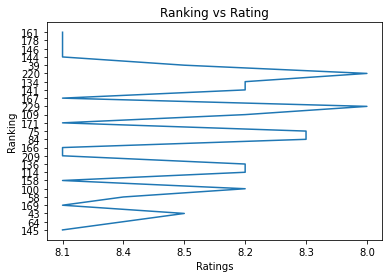

In [21]:
#line graph for ranking and rating 
x = df['Rating']
y = df['Ranking']
plt.plot(x[:25], y[:25])
plt.xlabel('Ratings')
plt.ylabel('Ranking')
plt.title('Ranking vs Rating')
plt.show()

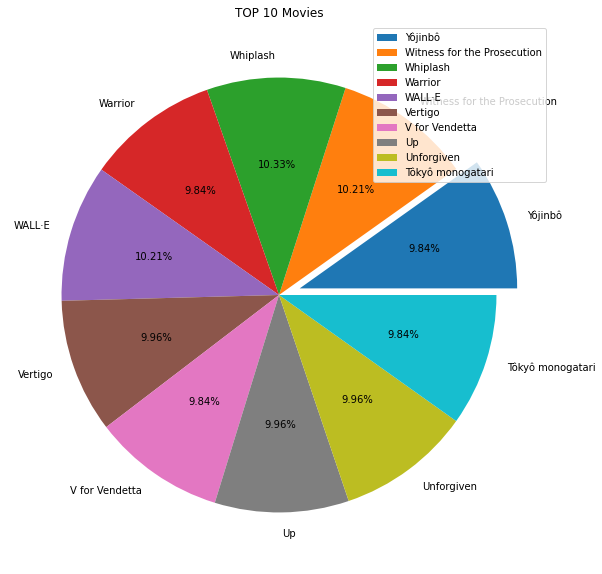

In [28]:
#pie chart for top 10 movies
cont = df['Movie Names'][:10]

# Creating plot
fig = plt.figure(figsize =(10, 10))
plt.pie(x[:10], labels = cont, explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0], autopct = '%1.2f%%')
# show plot
plt.title('TOP 10 Movies')
plt.legend()
plt.show()

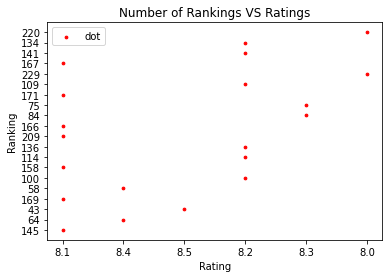

In [24]:
#scatterd ploting of ranking and rating
plt.scatter(x[:20], y[:20], label= "dot", color= "red",
            marker= ".", s=30)
 
# x-axis label
plt.xlabel('Rating')
# frequency label
plt.ylabel('Ranking')
# plot title
plt.title('Number of Rankings VS Ratings')
# showing legend
plt.legend()
 
# function to show the plot
plt.show()